In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

In [2]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [4]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_train.shape, y_val.shape)

(35000, 10) (15000, 10)


In [5]:
# Normalizing the Images

x_train=x_train/255.0
print(x_train.shape)
x_test=x_test/255.0
print(x_test.shape)

(35000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU, Activation
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                      

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

hist = model.fit(x_train,y_train,
                 validation_split=0.3,
                 epochs=20)
                #  callbacks=[early_stopping])

Epoch 1/20
766/766 [==============================] - 21s 10ms/step - loss: 1.5432 - accuracy: 0.4661 - val_loss: 1.2073 - val_accuracy: 0.5685
Epoch 2/20
766/766 [==============================] - 6s 8ms/step - loss: 1.1040 - accuracy: 0.6116 - val_loss: 1.1751 - val_accuracy: 0.5930
Epoch 3/20
766/766 [==============================] - 7s 9ms/step - loss: 0.9657 - accuracy: 0.6640 - val_loss: 1.0382 - val_accuracy: 0.6467
Epoch 4/20
766/766 [==============================] - 6s 8ms/step - loss: 0.8821 - accuracy: 0.6922 - val_loss: 0.8631 - val_accuracy: 0.7014
Epoch 5/20
766/766 [==============================] - 7s 9ms/step - loss: 0.8012 - accuracy: 0.7176 - val_loss: 0.9108 - val_accuracy: 0.6865
Epoch 6/20
766/766 [==============================] - 7s 9ms/step - loss: 0.7361 - accuracy: 0.7409 - val_loss: 0.8499 - val_accuracy: 0.6994
Epoch 7/20
766/766 [==============================] - 7s 9ms/step - loss: 0.6841 - accuracy: 0.7595 - val_loss: 0.9051 - val_accuracy: 0.6870
Epoc

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0920 - accuracy: 0.6737


In [10]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6736999750137329


In [11]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print("Train accuracy: {}".format(train_accuracy))

1094/1094 [==============================] - 5s 5ms/step - loss: 0.5848 - accuracy: 0.8134
Train accuracy: 0.8134285807609558


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


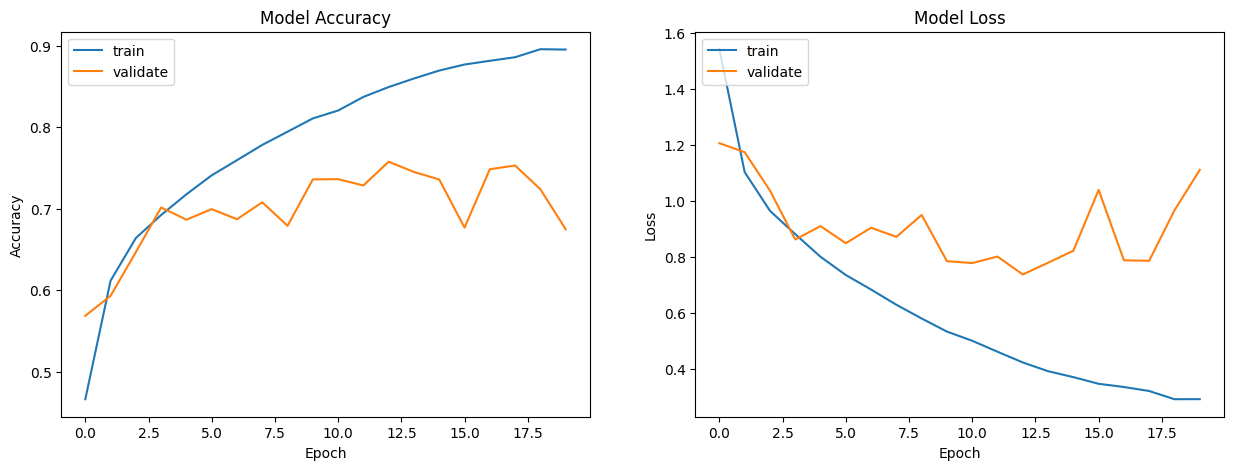

In [12]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(hist.history['accuracy'])
    axs[0].plot(hist.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(hist.history['loss'])
    axs[1].plot(hist.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(hist.history.keys())

plotmodelhistory(hist)